## import libraries

In [124]:
from clustering import clustering_temporal as ct
from clustering import clustering_spatial as cs
from RGCPD import core_pp
from RGCPD import functions_pp
from RGCPD import plot_maps as pm
import uuid
import xarray as xr

In [125]:
import sklearn.cluster as cluster
import numpy as np

In [224]:
data_path = 'C:\\Users\\alicj\\Desktop\\WORK\\data'

## import data

In [80]:
#time_space_3d = core_pp.import_ds_lazy('C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc')
var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\data_small.nc'
time_space_3d = core_pp.import_ds_lazy(var_filename)
time_space_3d

<xarray.DataArray 'sst' (time: 30, latitude: 180, longitude: 360)>
[1944000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1952-06-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

## create 2d mask

In [51]:
mask = cs.get_spatial_ma(var_filename, [130,160,30,50])
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [52]:
sum(sum(mask == True))

600

## test create_vector function

In [53]:
space_time_vec, output_space_time, indices_mask = ct.create_vector(time_space_3d, mask)

In [54]:
# shape is (600, 30), where 600 is the number of gridpoints where mask == True, 30 is the number of timepoints
space_time_vec.shape   

(600, 30)

In [55]:
output_space_time.size  # list of 64800 0/1 values, 600 entries are 1's (where mask == True)

64800

In [56]:
indices_mask # indices where mask == True

array([43330, 43331, 43332, 43333, 43334, 43335, 43336, 43337, 43338,
       43339, 43340, 43341, 43342, 43343, 43344, 43345, 43346, 43347,
       43348, 43349, 43350, 43351, 43352, 43353, 43354, 43355, 43356,
       43357, 43358, 43359, 43690, 43691, 43692, 43693, 43694, 43695,
       43696, 43697, 43698, 43699, 43700, 43701, 43702, 43703, 43704,
       43705, 43706, 43707, 43708, 43709, 43710, 43711, 43712, 43713,
       43714, 43715, 43716, 43717, 43718, 43719, 44050, 44051, 44052,
       44053, 44054, 44055, 44056, 44057, 44058, 44059, 44060, 44061,
       44062, 44063, 44064, 44065, 44066, 44067, 44068, 44069, 44070,
       44071, 44072, 44073, 44074, 44075, 44076, 44077, 44078, 44079,
       44410, 44411, 44412, 44413, 44414, 44415, 44416, 44417, 44418,
       44419, 44420, 44421, 44422, 44423, 44424, 44425, 44426, 44427,
       44428, 44429, 44430, 44431, 44432, 44433, 44434, 44435, 44436,
       44437, 44438, 44439, 44770, 44771, 44772, 44773, 44774, 44775,
       44776, 44777,

## test sklearn_clustering

In [57]:
#var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc'
#var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\tf5_nc5_dendo_80d77.nc'

## testing skclustering

In [58]:
def skclustering(time_space_3d, mask2d=None, clustermethodkey='AgglomerativeClustering',
                 kwrgs={'n_clusters':3}):
    '''
    Is build upon sklean clustering. Algorithms available are listed in cluster.__dict__,
    e.g. KMeans, or AgglomerativeClustering, kwrgs are algorithms dependend.
    '''
    algorithm = cluster.__dict__[clustermethodkey]

    cluster_method = algorithm(**kwrgs)
    space_time_vec, output_space_time, indices_mask = cs.create_vector(time_space_3d, mask2d)

    space_time_vec[np.isnan(space_time_vec)] = -32767.0 #replace nans
    results = cluster_method.fit(space_time_vec)
    labels = results.labels_ + 1
    xrclustered = cs.labels_to_latlon(time_space_3d, labels, output_space_time, indices_mask, mask2d)
    return xrclustered.values, results

In [59]:
time_space_3d = core_pp.import_ds_lazy(var_filename)

In [60]:
time_space_3d

<xarray.DataArray 'sst' (time: 30, latitude: 180, longitude: 360)>
[1944000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1952-06-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [61]:
clustermethodkey='AgglomerativeClustering'
algorithm = cluster.__dict__[clustermethodkey]
kwrgs={'n_clusters':3}

cluster_method = algorithm(**kwrgs)

In [62]:
mask2d = cs.get_spatial_ma(var_filename, [130,160,30,50])

space_time_vec, output_space_time, indices_mask = cs.create_vector(time_space_3d, mask2d)

In [63]:
space_time_vec[np.isnan(space_time_vec)] = -32767.0 #replace nans

In [64]:
results = cluster_method.fit(space_time_vec)

In [65]:
labels = results.labels_ + 1

In [66]:
labels.shape

(600,)

## testing labels_to_latlon

In [67]:
def labels_to_latlon(time_space_3d, labels, output_space_time, indices_mask, mask2d):
    """
    Input: 
    time_space_3d -> xarray object with time, lat, lon
    labels -> 
    output_space_time -> 
    indices_mask -> 
    mask2d -> 2d boolean mask? for coordinates (not used in temporal clustering)
    """
    # chooses all coordinates for the first datetime of the data
    xrspace = time_space_3d[0].copy()
    print('output_space_time shape {}'.format(output_space_time.shape))
    print('indices_mask shape {}'.format(indices_mask.shape))
    print('output_space_time[indices_mask] shape {}'.format(output_space_time[indices_mask].shape))
    print('labels shape {}'.format(labels.shape))
    # only choose those coordinate for which mask is 1
    output_space_time[indices_mask] = labels
    output_space_time = output_space_time.reshape((time_space_3d.latitude.size, time_space_3d.longitude.size)) # array with dim (#lat, #lon)
    # add data to xarray
    xrspace.values = output_space_time
    xrspace = xrspace.where(mask2d==True)
    return xrspace

In [68]:
xrclustered = labels_to_latlon(time_space_3d, labels, output_space_time, indices_mask, mask2d)

output_space_time shape (64800,)
indices_mask shape (600,)
output_space_time[indices_mask] shape (600,)
labels shape (600,)


In [69]:
sum(np.isnan(xrclustered.values) == False)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [70]:
xrclustered

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time       datetime64[ns] 1950-01-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [71]:
time_space_3d

<xarray.DataArray 'sst' (time: 30, latitude: 180, longitude: 360)>
[1944000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1952-06-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

## testing sklearn_clustering

In [73]:
def sklearn_clustering(var_filename, mask=None, kwrgs_load={},
                           clustermethodkey='DBSCAN',
                           kwrgs_clust={'eps':600}):

    if 'selbox' in kwrgs_load.keys():
        if kwrgs_load['selbox'] is not None:
            mask = kwrgs_load.pop('selbox')
            print('mask overwritten with selbox list. Both selbox and mask are given.'
                  'Both adapt the domain over which to cluster')
    kwrgs_l_spatial = {} # kwrgs affecting spatial extent/format
    if 'format_lon' in kwrgs_load.keys():
        kwrgs_l_spatial['format_lon'] = kwrgs_load['format_lon']

    xarray = core_pp.import_ds_lazy(var_filename, **kwrgs_l_spatial)
    npmask = cs.get_spatial_ma(var_filename, mask, kwrgs_l_spatial=kwrgs_l_spatial)


    kwrgs_loop = {k:i for k, i in kwrgs_clust.items() if type(i) == list}
    [kwrgs_loop.update({k:i}) for k, i in kwrgs_load.items() if type(i) == list]

    if len(kwrgs_loop) == 1:
        # insert fake axes
        kwrgs_loop['fake'] = [0]
    if len(kwrgs_loop) >= 1:
        new_coords = []
        xrclustered = xarray[0].drop('time')
        for k, list_v in kwrgs_loop.items(): # in alphabetical order
            new_coords.append(k)
            dim_coords = {str(k):list_v}
            xrclustered = xrclustered.expand_dims(dim_coords).copy()
        new_coords = [d for d in xrclustered.dims if d not in ['latitude', 'longitude']]
        results = []
        first_loop = kwrgs_loop[new_coords[0]]
        second_loop = kwrgs_loop[new_coords[1]]
        for i, v1 in enumerate(first_loop):
            for j, v2 in enumerate(second_loop):
                kwrgs = cs.adjust_kwrgs(kwrgs_clust.copy(), new_coords, v1, v2)
                kwrgs_l = cs.adjust_kwrgs(kwrgs_load.copy(), new_coords, v1, v2)
                print(f"\rclustering {new_coords[0]}: {v1}, {new_coords[1]}: {v2} ", end="")
                xarray = functions_pp.import_ds_timemeanbins(var_filename, **kwrgs_l)


                xrclustered[i,j], result = skclustering(xarray, npmask,
                                                   clustermethodkey=clustermethodkey,
                                                   kwrgs=kwrgs)
                results.append(result)
        if 'fake' in new_coords:
            xrclustered = xrclustered.squeeze().drop('fake').copy()
    else:
        xrclustered, results = skclustering(xarray, npmask,
                                            clustermethodkey=clustermethodkey,
                                            kwrgs=kwrgs_clust)
    xrclustered.attrs['method'] = clustermethodkey
    xrclustered.attrs['kwrgs'] = str(kwrgs_clust)
    xrclustered.attrs['target'] = f'{xarray.name}'
    #if 'hash' not in xrclustered.attrs.keys():
       # xrclustered.attrs['hash']   = uuid.uuid4().hex[:5]
    return xrclustered, results

In [74]:
var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\data_small.nc'
mask=None
kwrgs_load={'selbox':[130,160,30,50]}
clustermethodkey='DBSCAN'
kwrgs_clust={'eps':[600, 700]}

In [90]:
#xrclusteredall, results = sklearn_clustering(var_filename, mask, kwrgs_load, clustermethodkey, kwrgs_clust)
xrclusteredall, results = sklearn_clustering(var_filename, mask=mask, kwrgs_load={'selbox':[130,160,30,50]},
                                             clustermethodkey='DBSCAN', kwrgs_clust={'eps':[8, 10]})

mask overwritten with selbox list. Both selbox and mask are given.Both adapt the domain over which to cluster
clustering fake: 0, eps: 10 

In [91]:
xrclusteredall

<xarray.DataArray 'sst' (eps: 2, latitude: 180, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * eps        (eps) int32 8 10
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K
    method:     DBSCAN
    kwrgs:      {'eps': [8, 10]}
    target:     sst

In [87]:
xrclusteredall += 1

Plotting Corr maps sst, split 0, eps 8
Plotting Corr maps sst, split 0, eps 10


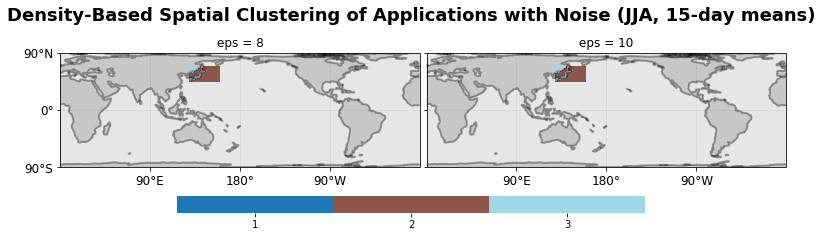

In [89]:
fig = pm.plot_labels(xrclusteredall, {'col_dim':'eps', 'title':'Density-Based Spatial Clustering of Applications with Noise (JJA, 15-day means)'})

# temporal clustering testing

In [250]:
def skclustering(time_space_3d, mask2d=None, clustermethodkey='AgglomerativeClustering',
                 kwrgs={'n_clusters':4}, dimension = 'temporal'):
    '''
    Is build upon sklean clustering. Algorithms available are listed in cluster.__dict__,
    e.g. KMeans, or AgglomerativeClustering, kwrgs are algorithms dependend.
    '''
    algorithm = cluster.__dict__[clustermethodkey]

    cluster_method = algorithm(**kwrgs)
    space_time_vec, output_space_time, indices_mask = ct.create_vector(time_space_3d, mask2d)
    space_time_vec[np.isnan(space_time_vec)] = -32767.0 #replace nans
    
    if dimension == 'temporal':
        results = cluster_method.fit(space_time_vec.swapaxes(0, 1))
    else:
        results = cluster_method.fit(space_time_vec)
        
    labels = results.labels_ + 1
    
    # retrieving labels for spatial clustering
    if dimension == 'spatial':
        xrclustered = ct.labels_to_latlon(time_space_3d, labels, output_space_time, indices_mask, mask2d)
        return xrclustered, results
    else:
        ### HERE I NEED TO CREATE XR OBJECT AND ADD LABELS AS VALUES (like in labels to latlon, must have shape (30, 180, 360))
        print('cluster: {}'.format(labels))
        return time_space_3d, results
        #return xrclustered, results

In [251]:
var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\data_small.nc'
time_space_3d = core_pp.import_ds_lazy(var_filename)

In [252]:
mask2d = ct.get_spatial_ma(var_filename, [130, 160, 30, 50])

In [253]:
clustermethodkey = 'AgglomerativeClustering'
kwrgs={'n_clusters':4}
dimension = 'temporal'
#dimension = 'spatial'

In [256]:
time_space_3d_out, results = skclustering(time_space_3d, mask2d, clustermethodkey, kwrgs, dimension)

cluster: [2 2 2 2 4 1 3 3 3 1 1 4 2 2 2 2 4 1 1 3 3 1 1 4 2 2 2 2 4 1]


In [257]:
time_space_3d_out

<xarray.DataArray 'sst' (time: 30, latitude: 180, longitude: 360)>
[1944000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1952-06-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [231]:
### for temporal
time_space_3d_out, results = skclustering(time_space_3d, mask2d, clustermethodkey, kwrgs, dimension)

In [232]:
time_space_3d_out

<xarray.DataArray 'sst' (time: 30, latitude: 180, longitude: 360)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [271.4599, 271.4599, ..., 271.4599, 271.4599],
        [271.4599, 271.4599, ..., 271.4599, 271.4599]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [271.4593, 271.4593, ..., 271.4593, 271.4593],
        [271.4593, 271.4593, ..., 271.4593, 271.4593]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [271.4599, 271.4599, ..., 271.4599, 271.4599],
        [271.4599, 271.4599, ..., 271.4599, 271.4599]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [271.4599, 271.4599, ..., 271.4599, 271.4599],
        [271.4599, 271.4599, ..., 271.4599, 271.4599]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1952-06-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [191]:
labels.shape

(30,)

![Getting Started](labels_example.png)

## testing sklearn_clustering

In [161]:
def sklearn_clustering(var_filename, mask=None, 
                       dimension='temporal',
                       kwrgs_load={},
                           clustermethodkey='DBSCAN',
                           kwrgs_clust={'eps':600}):

    # kwrgs_load - keywords that we can give to load variable
    
    # we can either give a mask for coordinates or just select a box with coordinates
    if 'selbox' in kwrgs_load.keys():
        if kwrgs_load['selbox'] is not None:
            mask = kwrgs_load.pop('selbox')
            print('mask overwritten with selbox list. Both selbox and mask are given.'
                  'Both adapt the domain over which to cluster')
    kwrgs_l_spatial = {} # kwrgs affecting spatial extent/format
    if 'format_lon' in kwrgs_load.keys():
        kwrgs_l_spatial['format_lon'] = kwrgs_load['format_lon']

    # here we import an .nc file and convert it into an xarray object
    xarray = core_pp.import_ds_lazy(var_filename, **kwrgs_l_spatial)
    
    # here we create a numpy array mask for coordinates selected using mask (or selbox if selbox in kwrgs_load())
    npmask = ct.get_spatial_ma(var_filename, mask, kwrgs_l_spatial=kwrgs_l_spatial)


    # arguments loop
    kwrgs_loop = {k:i for k, i in kwrgs_clust.items() if type(i) == list}
    [kwrgs_loop.update({k:i}) for k, i in kwrgs_load.items() if type(i) == list]

    if len(kwrgs_loop) == 1:
        # insert fake axes
        kwrgs_loop['fake'] = [0]
    if len(kwrgs_loop) >= 1:
        new_coords = []
        
        # here we choose observations for the first timepoint and drop the time diemnsion
        xrclustered = xarray[0].drop('time')
        for k, list_v in kwrgs_loop.items(): # in alphabetical order
            
            # new_coords contains keys from kwrgs_clust and kwrgs_load
            new_coords.append(k)
            
            # in every iteration of the loop, we create a dictionary using key and value from kwrgs_clust and kwrgs_load
            dim_coords = {str(k):list_v}
            
            # expanding the xarray dataset by dim_coords dictionaries
            xrclustered = xrclustered.expand_dims(dim_coords).copy()
        
        # create a list of coordinates/dimensions added in the for loop above (from kwrgs_clust and kwrgs_load)
        new_coords = [d for d in xrclustered.dims if d not in ['latitude', 'longitude']]
        results = []
        
        # separating kwrgs into lists to loop over
        first_loop = kwrgs_loop[new_coords[0]]
        second_loop = kwrgs_loop[new_coords[1]]
        
        # loop over kwrgs_load and kwrgs_clust values
        for i, v1 in enumerate(first_loop):
            for j, v2 in enumerate(second_loop):
                
                # create dictionaries of all possible combinations of kwrgs_load and kwrgs_clust ??
                kwrgs = ct.adjust_kwrgs(kwrgs_clust.copy(), new_coords, v1, v2)
                kwrgs_l = ct.adjust_kwrgs(kwrgs_load.copy(), new_coords, v1, v2)
                
                print(f"\rclustering {new_coords[0]}: {v1}, {new_coords[1]}: {v2} ", end="")
                xarray = functions_pp.import_ds_timemeanbins(var_filename, **kwrgs_l)

                # updating xarray object and results - here change for supervised/unsupervised clustering
                xrclustered[i,j], result = skclustering(xarray, npmask,
                                                   clustermethodkey=clustermethodkey,
                                                   kwrgs=kwrgs, dimension = dimension)
                results.append(result)
        if 'fake' in new_coords:
            xrclustered = xrclustered.squeeze().drop('fake').copy()
            # if (type('n_clusters') == int and dimension == 'temporal') or dimension == 'spatial':
                # xrclustered.append()
    
    # if len(kwrgs_loop) == 0:
    else:
        xrclustered, results = skclustering(xarray, npmask,
                                            clustermethodkey=clustermethodkey,
                                            kwrgs=kwrgs_clust, dimension=dimension)
    # storing arbitrary metadata
    #xrclustered.attrs['method'] = clustermethodkey
    #xrclustered.attrs['kwrgs'] = str(kwrgs_clust)
    #xrclustered.attrs['target'] = f'{xarray.name}'
    #if 'hash' not in xrclustered.attrs.keys():
        #xrclustered.attrs['hash']   = uuid.uuid4().hex[:5]
    return xrclustered, results

In [167]:
mask_temp = None
kwrgs_load={'selbox':[130,160,30,50]}
print('kwrgs_load: {}'.format(kwrgs_load))
print('dimenion: {}'.format(dimension))
print('clustermethodkey: {}'.format(clustermethodkey))
kwrgs_clust={'eps':600}
print('kwrgs_clust: {}'.format(kwrgs_clust))

kwrgs_load: {'selbox': [130, 160, 30, 50]}
dimenion: temporal
clustermethodkey: AgglomerativeClustering
kwrgs_clust: {'eps': 600}


kwrgs
ar_filename, mask=None, 
                       dimension='temporal',
                       kwrgs_load={},
                           clustermethodkey='DBSCAN',
                           kwrgs_clust={'eps':600}

In [168]:
sklearn_clustering(var_filename, mask_temp, dimension, kwrgs_load, clustermethodkey, kwrgs_clust)

mask overwritten with selbox list. Both selbox and mask are given.Both adapt the domain over which to cluster


TypeError: __init__() got an unexpected keyword argument 'eps'

## some drafts

In [ ]:
#np.isnan(labels != True)
nan_array = np.isnan(labels)
not_nan_array = ~ nan_array
array2 = labels[not_nan_array]
results.labels_.shape